<a href="https://colab.research.google.com/github/codeninja404/deep_learning_models_from_scratch/blob/main/soham_functional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

Loading the test and training data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()   

Printing the intial shape of the data

In [ ]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_train.shape, y_train.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(50000, 32, 32, 3), y=(50000, 1)


Visualizing the input data

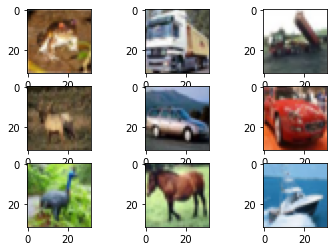

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])
plt.show()

Implementing the functional model<br>
Input shape = 32 x 32

In [ ]:
inputs = tf.keras.layers.Input(shape = (32,32,3))                               
x = tf.keras.layers.Conv2D(32, 3, activation = 'relu')(inputs)                  #Conv2D layer added with a kernel of size 3x3, 32 nodes and activation function relu
x = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(x)                          #MaxPooling layer with a pool_size of 2x2 
x = tf.keras.layers.Conv2D(64, 3, activation = 'relu')(x)                       
x = tf.keras.layers.MaxPooling2D()(x)                                           
x = tf.keras.layers.Conv2D(128, 3, activation = 'relu')(x)                      
x = tf.keras.layers.Flatten()(x)                                                 
x = tf.keras.layers.Dense(64, activation = 'relu')(x)                           #Dense layer added with 64 nodes and relu activation function
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)                     
model = tf.keras.Model(inputs = inputs, outputs = outputs)                      


In [ ]:
def schedular(epochs, lr):
  if epochs < 2:
    return lr
  else:
    return lr * 0.99

In [ ]:
lr_schedular = keras.callbacks.LearningRateScheduler(schedular, verbose = 1)    #At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at __init__, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

Reviewig the built model

In [ ]:
model.summary() 

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0   

Visualizing the shape at each layer of the model 

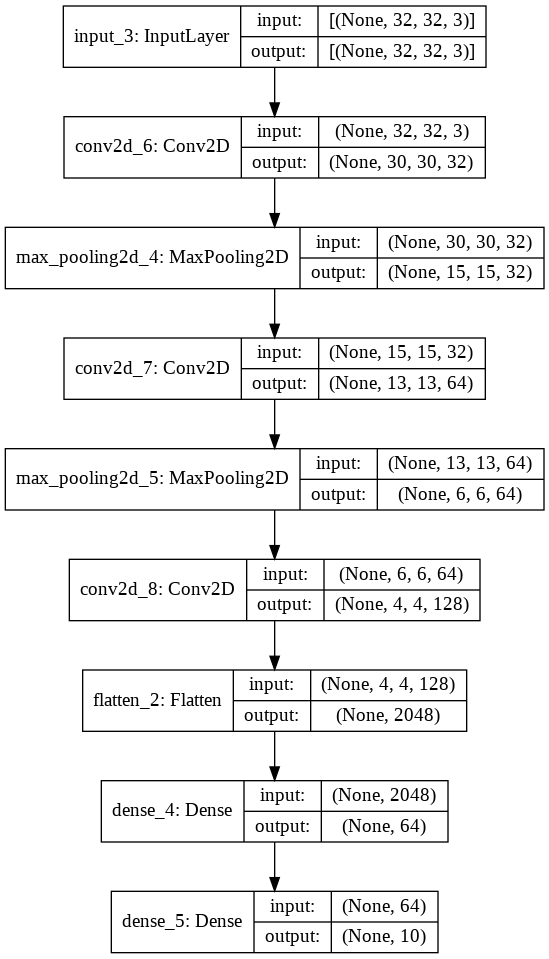

In [ ]:
from keras.utils import plot_model                                              
plot_model(model, to_file = 'model.png', show_shapes=True)

In [ ]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = False),     #Computes the crossentropy loss between the labels and predictions.
    optimizer = keras.optimizers.Adam(lr = 3e-4),                               #Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.
    metrics =["accuracy"],                                                       
    )

In [ ]:
model_history = model.fit(x_train, y_train, batch_size = 64,                       
                          epochs = 10, verbose = 2,
                          callbacks = [lr_schedular])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0003000000142492354.
782/782 - 60s - loss: 2.3972 - accuracy: 0.1419
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0003000000142492354.
782/782 - 59s - loss: 1.7721 - accuracy: 0.3325
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000297000014106743.
782/782 - 59s - loss: 1.3735 - accuracy: 0.4948
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0002940300203044899.
782/782 - 59s - loss: 1.1945 - accuracy: 0.5674
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.00029108973249094563.
782/782 - 59s - loss: 1.0581 - accuracy: 0.6208
Epoch 6/10

Epoch 00006: LearningRateScheduler reducing learning rate to 0.00028817883372539655.
782/782 - 59s - loss: 0.9533 - accuracy: 0.6601
Epoch 7/10

Epoch 00007: LearningRateScheduler reducing learning rate to 0.00028529703587992116.
782/782 - 60s - loss: 0.8548 - accurac

In [ ]:
model.evaluate(x_test, y_test, batch_size = 64, verbose = 2)  

157/157 - 4s - loss: 1.0180 - accuracy: 0.6695


[1.0180140733718872, 0.6694999933242798]

Visualizing the accuracy

<function matplotlib.pyplot.show>

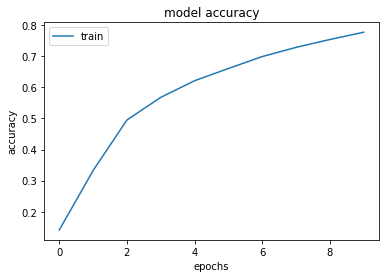

In [ ]:
plt.plot(model_history.history['accuracy'])                                     
plt.title('model accuracy')                                                     
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show

Visualizing the loss 

<function matplotlib.pyplot.show>

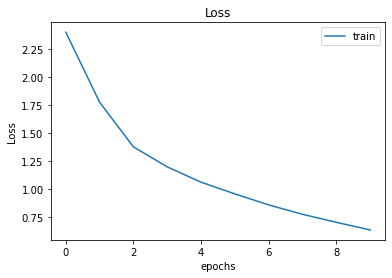

In [ ]:
plt.plot(model_history.history['loss'])                                         
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper right')
plt.show